In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from common import *
from plotting import *

In [3]:
def filter_results(df, pattern) :
    return df.filter(regex=pattern, axis=0)

In [26]:
def get_results(data_name) :
    yr_df = []
    for n in os.listdir('outputs/ts_experiments/') :
        for model in ['baselines', 'Basic', 'Attention', 'Structured Attention', 'Hierarchical Attention'] :
            name = os.path.join('outputs/ts_experiments/', n, data_name, model)
            if os.path.exists(name) :
                dirs = os.listdir(name)
                dfs = {}
                for d in sorted(dirs) :
                    dirname = os.path.join(name, d)
                    if os.path.isdir(dirname) :
                        model_name = get_latest_model(dirname)
                        if model_name is not None :
                            df = json.load(open(os.path.join(model_name, 'evaluate.json')))
                            df['Training Size'] = int(n.split('=')[1])
                            df['model'] = d
                            df['is_LR'] = 'LR' in d
                            yr_df.append(df)

    yr_df = pd.DataFrame(yr_df)
    return yr_df

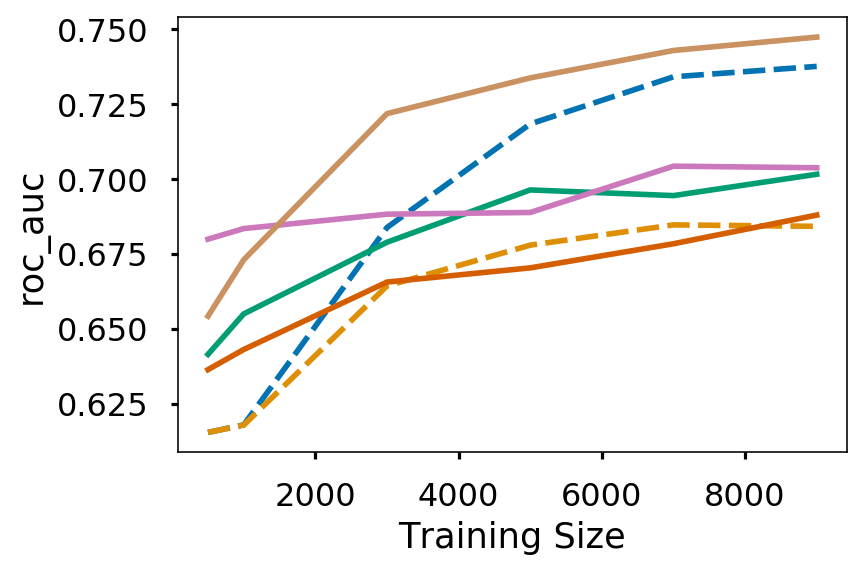

In [27]:
import seaborn as sns
df_readmission = get_results('Readmission')
fig = sns.lineplot(x='Training Size', y='roc_auc', hue='model', style='is_LR', data=df_readmission, legend='brief')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.axes.get_legend().remove()
fig.figure.savefig('Text-encoding-EHR/results/Readmission/learning_curve.pdf', bbox_inches='tight')

In [28]:
Models = ['CountBoW', 'Structured', 'Average', 'LSTM', 'Pretrained-LSTM', 'LSTM+Attention']
colors = sns.color_palette().as_hex()[:len(Models)]
for m, c in zip(Models, colors) :
    print(m, "(\\textcolor[HTML]{" + c[1:] + "}{$\\blacksquare$})")
    print(",")

CountBoW (\textcolor[HTML]{0173b2}{$\blacksquare$})
,
Structured (\textcolor[HTML]{de8f05}{$\blacksquare$})
,
Average (\textcolor[HTML]{029e73}{$\blacksquare$})
,
LSTM (\textcolor[HTML]{d55e00}{$\blacksquare$})
,
Pretrained-LSTM (\textcolor[HTML]{cc78bc}{$\blacksquare$})
,
LSTM+Attention (\textcolor[HTML]{ca9161}{$\blacksquare$})
,


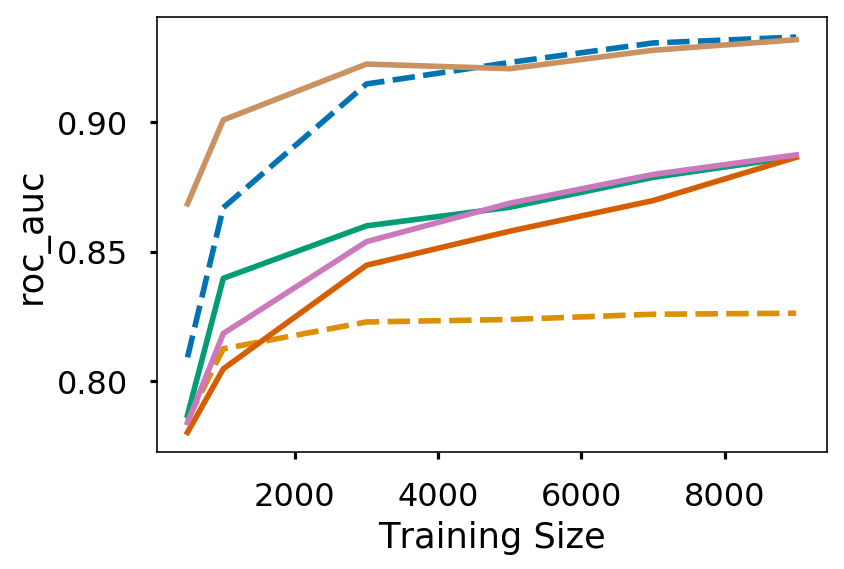

In [29]:
df_readmission = get_results('Mortality_30day')
fig = sns.lineplot(x='Training Size', y='roc_auc', hue='model', style='is_LR', data=df_readmission, legend=False)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.figure.savefig('Text-encoding-EHR/results/Mortality_30day/learning_curve.pdf', bbox_inches='tight')